# Actividad - Proyecto práctico

> La actividad se desarrollará en grupos pre-definidos de 2-3 alumnos. Se debe indicar los nombres en orden alfabético (de apellidos). Recordad que esta actividad se corresponde con un 30% de la nota final de la asignatura. Se debe entregar entregar el trabajo en la presente notebook.
* Alumno 1: Benali, Abdelilah
* Alumno 2: Cuesta Cifuentes, Jair
* Alumno 3: González Huete, Manel
* Alumno 4: Manzanas Mogrovejo, Francisco
* Alumno 5: Pascual, Guadalupe

---
## **PARTE 1** - Instalación y requisitos previos

> Las prácticas han sido preparadas para poder realizarse en el entorno de trabajo de Google Colab. Sin embargo, esta plataforma presenta ciertas incompatibilidades a la hora de visualizar la renderización en gym. Por ello, para obtener estas visualizaciones, se deberá trasladar el entorno de trabajo a local. Por ello, el presente dosier presenta instrucciones para poder trabajar en ambos entornos. Siga los siguientes pasos para un correcto funcionamiento:
1.   **LOCAL:** Preparar el enviroment, siguiendo las intrucciones detalladas en la sección *1.1.Preparar enviroment*.
2.  **AMBOS:** Modificar las variables "mount" y "drive_mount" a la carpeta de trabajo en drive en el caso de estar en Colab, y ejecturar la celda *1.2.Localizar entorno de trabajo*.
3. **COLAB:** se deberá ejecutar las celdas correspondientes al montaje de la carpeta de trabajo en Drive. Esta corresponde a la sección *1.3.Montar carpeta de datos local*.
4.  **AMBOS:** Instalar las librerías necesarias, siguiendo la sección *1.4.Instalar librerías necesarias*.




---
### 1.1. Preparar enviroment (solo local)



> Para preparar el entorno de trabajo en local, se han seguido los siguientes pasos:
1. En Windows, puede ser necesario instalar las C++ Build Tools. Para ello, siga los siguientes pasos: https://towardsdatascience.com/how-to-install-openai-gym-in-a-windows-environment-338969e24d30.
2. Instalar Anaconda
3. Siguiendo el código que se presenta comentado en la próxima celda: Crear un enviroment, cambiar la ruta de trabajo, e instalar librerías básicas.


```
conda update --all
conda create --name miar_rl python=3.8
conda activate miar_rl
cd "PATH_TO_FOLDER"
conda install git
pip install jupyter
```


4. Abrir la notebook con *jupyter-notebook*.



```
jupyter-notebook
```




---
### 1.2. Localizar entorno de trabajo: Google colab o local

In [1]:
# ATENCIÓN!! Modificar ruta relativa a la práctica si es distinta (drive_root)
mount='/content/gdrive'
drive_root = mount + "/My Drive/VIU/08_AR_MIAR/sesiones_practicas/sesion_practica_1"

try:
  from google.colab import drive
  IN_COLAB=True
except:
  IN_COLAB=False

IN_COLAB=False

---
### 1.3. Montar carpeta de datos local (solo Colab)

In [2]:
# Switch to the directory on the Google Drive that you want to use
import os
if IN_COLAB:
  print("We're running Colab")

  if IN_COLAB:
    # Mount the Google Drive at mount
    print("Colab: mounting Google drive on ", mount)

    drive.mount(mount)

    # Create drive_root if it doesn't exist
    create_drive_root = True
    if create_drive_root:
      print("\nColab: making sure ", drive_root, " exists.")
      os.makedirs(drive_root, exist_ok=True)

    # Change to the directory
    print("\nColab: Changing directory to ", drive_root)
    %cd $drive_root
# Verify we're in the correct working directory
%pwd
print("Archivos en el directorio: ")
print(os.listdir())

Archivos en el directorio: 
['.config', 'checkpoint', 'dqn_SpaceInvaders-v0_weights.h5f.data-00000-of-00001', 'dqn_BreakoutDeterministic-v4_log.json', 'checkpoints', 'dqn_BreakoutDeterministic-v4_weights.h5f.index', 'dqn_SpaceInvaders-v0_log.json', 'DQN_log.json', 'dqn_SpaceInvaders-v0_weights.h5f.index', 'dqn_BreakoutDeterministic-v4_weights.h5f.data-00000-of-00001', 'sample_data']


---
### 1.4. Instalar librerías necesarias


In [3]:
IN_LOCAL = True

if IN_COLAB:
  %pip install gym==0.17.3
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install keras-rl2==1.0.5
  %pip install tensorflow==2.8
if not IN_LOCAL:
  %pip install numpy==1.23.5
  %pip install gym==0.17
  %pip install git+https://github.com/Kojoley/atari-py.git
  %pip install pyglet==1.5.0
  %pip install h5py==3.1.0
  %pip install Pillow==9.5.0
  %pip install keras-rl2==1.0.5
  %pip install Keras==2.2.4
  %pip install tensorflow==2.5.3
  %pip install torch==2.0.1
  %pip install agents==1.4.0
  %pip install matplotlib==3.4.3
  %pip install tqdm

---
## **PARTE 2**. Enunciado

Consideraciones a tener en cuenta:

- El entorno sobre el que trabajaremos será _SpaceInvaders-v0_ y el algoritmo que usaremos será _DQN_.

- Para nuestro ejercicio, el requisito mínimo será alcanzado cuando el agente consiga una **media de recompensa por encima de 20 puntos en modo test**. Por ello, esta media de la recompensa se calculará a partir del código de test en la última celda del notebook.

Este proyecto práctico consta de tres partes:

1.   Implementar la red neuronal que se usará en la solución
2.   Implementar las distintas piezas de la solución DQN
3.   Justificar la respuesta en relación a los resultados obtenidos

**Rúbrica**: Se valorará la originalidad en la solución aportada, así como la capacidad de discutir los resultados de forma detallada. El requisito mínimo servirá para aprobar la actividad, bajo premisa de que la discusión del resultado sera apropiada.

IMPORTANTE:

* Si no se consigue una puntuación óptima, responder sobre la mejor puntuación obtenida.
* Para entrenamientos largos, recordad que podéis usar checkpoints de vuestros modelos para retomar los entrenamientos. En este caso, recordad cambiar los parámetros adecuadamente (sobre todo los relacionados con el proceso de exploración).
* Se deberá entregar unicamente el notebook y los pesos del mejor modelo en un fichero .zip, de forma organizada.
* Cada alumno deberá de subir la solución de forma individual.

---
## **PARTE 3**. Desarrollo y preguntas

#### Importar librerías

In [4]:
from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import gc       # Para garbage collection
import random
import os
import pickle
import re       # Para expresiones regulares en carga de checkpoints
import gym      # Para el entorno de Atari
import cv2      # Para preprocesamiento de imágenes si se usa AtariProcessor
import warnings
import time
import psutil
import tracemalloc
from rl.memory import SequentialMemory
from rl.agents.dqn import DQNAgent, AbstractDQNAgent

from PIL import Image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.layers import Lambda, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint
from collections import deque
from tqdm import trange     # Necesaria para la barra de progreso en simple_train
import tensorflow.keras.backend as K

In [5]:
# Necesario para la grabación de video
try:
    import gym.wrappers
except ImportError:
    print("WARNING: gym.wrappers no está disponible. La grabación de video no funcionará.")
    gym.wrappers = None # Asegurar que no dé error si no se encuentra


In [6]:
# Configurar TensorFlow para CPU (x cores)
def optimizar_tensorflow():
    """Configura TensorFlow para rendimiento óptimo en CPU/GPU"""
    # Limpiar sesión previa
    gc.collect()

    # Optimización de GPU si está disponible
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            print(f"GPU optimizada para crecimiento adaptativo de memoria")
        except Exception as e:
            print(f"Error al configurar GPU: {e}")

    # Optimización de CPU
    num_cpu_cores = os.cpu_count() or 8  # Fallback a 8 si no se puede detectar

    os.environ["OMP_NUM_THREADS"] = str(num_cpu_cores // 2)
    os.environ["OPENBLAS_NUM_THREADS"] = str(num_cpu_cores // 2)
    os.environ["MKL_NUM_THREADS"] = str(num_cpu_cores // 2)

    tf.config.threading.set_intra_op_parallelism_threads(num_cpu_cores // 2)
    tf.config.threading.set_inter_op_parallelism_threads(max(2, num_cpu_cores // 4))

    # Modo eager solo si es necesario
    # Para entrenamiento, es mejor desactivarlo por rendimiento
    tf.config.run_functions_eagerly(False)

    print(f"TensorFlow optimizado para {num_cpu_cores} cores CPU")
    return True

#### Crear el entorno
Nuestro entorno es el juego Space Invaders, de Atari

In [7]:
# Crear el entorno
env_name = 'SpaceInvaders-v0'
env = gym.make(env_name)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

In [8]:
print("El tamaño de nuestro 'frame' es: ", env.observation_space)
print("El número de acciones posibles es : ", nb_actions)
print("Las acciones posibles son : ",env.env.get_action_meanings())

# Here we create an hot encoded version of our actions
# possible_actions = [[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0]...]
possible_actions = np.array(np.identity(env.action_space.n,dtype=int).tolist())
print("\nOHE de las acciones posibles: \n", possible_actions)

El tamaño de nuestro 'frame' es:  Box(0, 255, (210, 160, 3), uint8)
El número de acciones posibles es :  6
Las acciones posibles son :  ['NOOP', 'FIRE', 'RIGHT', 'LEFT', 'RIGHTFIRE', 'LEFTFIRE']

OHE de las acciones posibles: 
 [[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 1]]


#### Definición Hiperparámetros

In [9]:
### HIPERPARÁMETROS DEL MODELO
# Hiperparámetros optimizados
HEIGHT = 84
WIDTH = 84
USE_FRAMESTACK = True       # Cambiar a True si quieres detección de movimiento
WINDOW_LENGTH = 4 if USE_FRAMESTACK else 1   # Número de fotogramas apilados          # La mayoría de implementaciones usan 4 frames
batch_size = 32             # Tamaño de batch óptimo
gamma = 0.99                # Factor de descuento (mejor que 0.95 para recompensas a largo plazo)
learning_rate = 0.00025     # Tasa de aprendizaje estándar para DQN
memory_size = 1000000       # Buffer de memoria grande para mejor estabilidad
TARGET_UPDATE_INTERVAL = 10000  # Actualización de red objetivo cada 10,000 pasos
WARMUP_STEPS = 50000        # Pasos iniciales para llenar la memoria (experiencia aleatoria)
TRAINING_STEPS = 5000000    # Total de pasos de entrenamiento (5M para buenos resultados)
INPUT_SHAPE = (HEIGHT, WIDTH)                 # Dimensiones de cada frame

### HIPERPARÁMETROS DE PREPROCESAMIENTO

#CHANNELS_FIRST_SHAPE = (WINDOW_LENGTH, *INPUT_SHAPE)  # Para SequentialMemory (batch, channels, height, width)
MODEL_INPUT_SHAPE = (HEIGHT, WIDTH, WINDOW_LENGTH)  # Forma para el modelo (channels_last)

# Definir shape consistente
if USE_FRAMESTACK:
    state_shape = (84, 84, WINDOW_LENGTH)  # (84, 84, x)
else:
    state_shape = (84, 84, 1)  # (84, 84, 1) - escala de grises simple

state_size = (*INPUT_SHAPE, WINDOW_LENGTH)   # Nuestra entrada es una pila de 4 fotogramas, por lo tanto 110x84x4 (ancho, alto, canales)
input_shape = (*INPUT_SHAPE, WINDOW_LENGTH)  # Para la API de keras-rl
action_size = env.action_space.n       # 6 acciones posibles
learning_rate =  0.00025               # Alfa (también conocido como tasa de aprendizaje)

### HIPERPARÁMETROS DE ENTRENAMIENTO
# total_episodios = 10    #TEST        # Episodios totales para el entrenamiento
# max_steps = 10000       #TEST        # Máximo de pasos posibles por episodio
total_episodios = 100          # Episodios totales para el entrenamiento
max_steps = 3000               # Máximo de pasos posibles por episodio

# Parámetros de exploración para la estrategia epsilon-greedy
epsilon_start = 1.0            # Probabilidad de exploración al inicio
epsilon_stop = 0.01            # Probabilidad mínima de exploración
decay_rate = 0.00001           # Tasa de decaimiento exponencial para la probabilidad de exploración
epsilon_decay = 0.995

# Hiperparámetros del aprendizaje Q
tau = 0.001
checkpoint_path="checkpoints"

### HIPERPARÁMETROS DE MEMORIA
pretrain_length = batch_size   # Número de experiencias almacenadas en la memoria al inicializar por primera vez

### CAMBIA ESTO A FALSE SI SOLO QUIERES VER AL AGENTE ENTRENADO
training = False

## CAMBIA ESTO A TRUE SI QUIERES RENDERIZAR EL ENTORNO
episode_render = False

#### Clase "processor" para Atari

Ahora definimos un "processor" para las pantallas de entrada del juego, en el que recortamos el tamaño de la imagen (matriz de 210 x 160 píxeles) y la convertimos En una matriz bidimensional de 80 x 80 píxeles). También convertimos las imágenes de RGB a escala de grises normal, ya que no necesitamos usar los colores. Con este trabajo buscamos acelerar nuestro algoritmo, eliminando la información innecesaria y reduciendo la carga de la GPU.

In [10]:
class AtariProcessor(Processor):
    """
    Procesador para preprocesar observaciones del entorno Atari (e.g., SpaceInvaders-v0).

    Hereda de rl.core.Processor y proporciona métodos para convertir observaciones RGB en
    imágenes en escala de grises, redimensionarlas y normalizarlas, así como para limitar
    las recompensas.

    MÉTODOS:
    --------
        process_observation(observation): Convierte una observación RGB a escala de grises
                                         y la redimensiona.
        process_state_batch(batch): Normaliza un lote de estados dividiendo por 255.
        process_reward(reward): Limita las recompensas a un rango [-1, 1].
    """
    def __init__(self, input_shape=(INPUT_SHAPE)):
        self.input_shape = input_shape
        # Precargar una imagen negra para inicialización
        self.black_frame = np.zeros(input_shape, dtype=np.uint8)

    def process_observation(self, observation):
        """
        Preprocesa una observación convirtiéndola a escala de grises y redimensionándola.

        Parámetros:
        -----------
            observation (np.ndarray): Observación cruda del entorno con forma (height, width, channels).

        Retorna:
        --------
            np.ndarray: Imagen en escala de grises redimensionada a INPUT_SHAPE (84, 84) en formato uint8.

        Raises:
            AssertionError: Si la observación no tiene 3 dimensiones o la forma procesada no coincide con INPUT_SHAPE.
        """
        # Si la observación es None, devolver un marco negro
        if observation is None:
            return self.black_frame

        assert observation.ndim == 3  # (height, width, channel)
        # Crop the screen (remove the part below the player)
        # [Up: Down, Left: right]
        cropped_img = observation[18:-12, 4:-12]
        # Optimización: usar cv2 para redimensionar y convertir a escala de grises (más rápido que PIL)
        resized = cv2.resize(cropped_img, self.input_shape)
        # Convertir a escala de grises si es necesario
        if len(resized.shape) == 3:
            gray = cv2.cvtColor(resized, cv2.COLOR_RGB2GRAY)
        else:
            gray = resized
        assert gray.shape == self.input_shape
        return gray.astype(np.uint8)

    def process_state_batch(self, batch):
        """
        Normaliza un lote de estados dividiendo los valores por 255.

        Parámetros:
        -----------
            batch (np.ndarray): Lote de estados con valores en [0, 255].

        Retorna:
        --------
            np.ndarray: Lote normalizado con valores en [0, 1] en formato float32.
        """
        # Conversión directa a float32 y normalización
        return batch.astype(np.float32) / 255.0

    def process_reward(self, reward):
        """
        Normaliza un lote de estados dividiendo los valores por 255.

        Parámetros:
        -----------
            batch (np.ndarray): Lote de estados con valores en [0, 255].

        Retorna:
        --------
            np.ndarray: Lote normalizado con valores en [0, 1] en formato float32.
        """
        return np.clip(reward, -1., 1.)

    def process_step(self, observation, reward, done, info):
        """
        Procesa un paso completo del entorno.
        """
        processed_observation = self.process_observation(observation)
        processed_reward = self.process_reward(reward)
        return processed_observation, processed_reward, done, info

#### Revisar el entorno de juego

In [11]:
print("Numero de acciones disponibles: " + str(nb_actions))

Numero de acciones disponibles: 6


In [12]:
print("Formato de las observaciones:")
env.observation_space

Formato de las observaciones:


Box(0, 255, (210, 160, 3), uint8)

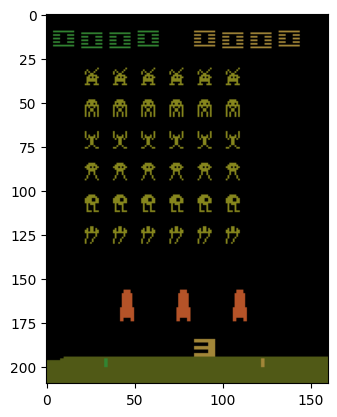

In [13]:
observation = env.reset()
for i in range(22):
  if i > 20:
    plt.imshow(observation)
    plt.show()

  observation, reward, done, info = env.step(1)

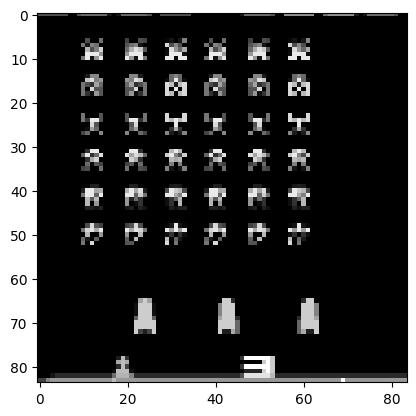

(210, 160, 3)
(84, 84)


In [14]:
# Mostrar las entradas preprocesadas en escala de grises y comparar originales y preprocesados.
processor = AtariProcessor()
obs_preprocessed = processor.process_observation(observation).reshape(INPUT_SHAPE)
# Seleccionamos el primer frame y lo normalizamos
frame = processor.process_state_batch(obs_preprocessed)
# Visualizar en escala de grises
plt.imshow(frame, cmap='gray')
plt.show()
print(observation.shape)
print(obs_preprocessed.shape)

#### Clase FrameStack para apilar frames

In [15]:
class FrameStack:
    """
    Clase para gestionar una pila de fotogramas consecutivos del entorno, utilizada para capturar
    el contexto temporal en juegos de Atari (e.g., SpaceInvaders-v0).

    Mantiene una cola (deque) de fotogramas preprocesados con un tamaño máximo definido por
    max_length, apilándolos para formar un estado con información de movimiento.

    Atributos:
    ----------
        frames (deque): Cola de fotogramas preprocesados con longitud máxima max_length.
        max_length (int): Número máximo de fotogramas a apilar (e.g., WINDOW_LENGTH).

    MÉTODOS:
    --------
        append(frame): Añade un nuevo fotograma a la pila, eliminando el más antiguo si es necesario.
        get_stacked_state(): Devuelve el estado apilado como un array NumPy.
    """
    def __init__(self, num_frames=4):
        """
        Inicializa la pila de fotogramas.

        Parámetros:
        -----------
            max_length (int): Número máximo de fotogramas a mantener en la pila.
        """
        self.num_frames = num_frames
        self.frames = deque([np.zeros((INPUT_SHAPE), dtype=np.int) for i in range(self.num_frames)], maxlen=self.num_frames)

    def reset(self):
        self.frames.clear()

    def add_frame(self, frame, is_new_episode):
        """
        Añade un fotograma preprocesado a la pila.

        Parámetros:
        -----------
            frame (np.ndarray): Fotograma preprocesado (e.g., imagen en escala de grises de 84x84).
        """
        # Si es el primer frame, llenamos el deque
        if is_new_episode:
            self.frames = deque([np.zeros((INPUT_SHAPE), dtype=np.int) for i in range(self.num_frames)], maxlen=self.num_frames)
            for _ in range(self.num_frames):
                self.frames.append(frame)
        else:
            self.frames.append(frame)

    def get_state(self):
        """
        Devuelve el estado apilado como un array NumPy con los fotogramas actuales.

        Si la pila no está llena, repite el último fotograma hasta completar max_length.

        Retorna:
        --------
            np.ndarray: Array de forma (84, 84, max_length) con los fotogramas apilados.
        """
        # Convertir a array con shape (84, 84, 4)
        return np.stack(self.frames, axis=-1)

#### Clase ReplayMemory

In [16]:
class ReplayMemory:
    """ReplayMemory optimizada para evitar fugas de memoria"""

    def __init__(self, capacity, state_shape):
        self.capacity = capacity
        self.position = 0
        self.size = 0

        # Pre-asignar arrays con el tamaño exacto
        # Usar uint8 para estados (más eficiente que float32)
        self.states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.actions = np.zeros(capacity, dtype=np.int32)
        self.rewards = np.zeros(capacity, dtype=np.float32)
        self.next_states = np.zeros((capacity, *state_shape), dtype=np.uint8)
        self.dones = np.zeros(capacity, dtype=np.bool_)

        print(f"ReplayMemory creada: {capacity} samples, {state_shape} shape")
        memory_size = (
            self.states.nbytes + self.next_states.nbytes +
            self.actions.nbytes + self.rewards.nbytes + self.dones.nbytes
        ) / (1024 * 1024)
        print(f"Memoria asignada: {memory_size:.2f} MB")

    def append(self, state, action, reward, next_state, done):
        """Añade una experiencia al buffer de forma eficiente"""
        # Convertir a uint8 para ahorrar memoria (estados son imágenes 0-255)
        if state.dtype != np.uint8:
            state = (state * 255).astype(np.uint8)
        if next_state.dtype != np.uint8:
            next_state = (next_state * 255).astype(np.uint8)

        # Almacenar directamente en el array pre-asignado
        self.states[self.position] = state
        self.actions[self.position] = action
        self.rewards[self.position] = reward
        self.next_states[self.position] = next_state
        self.dones[self.position] = done

        # Actualizar posición circular
        self.position = (self.position + 1) % self.capacity
        self.size = min(self.size + 1, self.capacity)

    def sample(self, batch_size):
        """Muestra un batch de experiencias de forma eficiente"""
        if self.size < batch_size:
            raise ValueError(f"No hay suficientes samples ({self.size}) para batch_size ({batch_size})")

        # Generar índices aleatorios
        indices = np.random.choice(self.size, batch_size, replace=False)

        # Extraer batch y convertir de vuelta a float32 para el entrenamiento
        batch_states = self.states[indices].astype(np.float32) / 255.0
        batch_actions = self.actions[indices]
        batch_rewards = self.rewards[indices]
        batch_next_states = self.next_states[indices].astype(np.float32) / 255.0
        batch_dones = self.dones[indices]

        return batch_states, batch_actions, batch_rewards, batch_next_states, batch_dones

    def __len__(self):
        return self.size

    def clear(self):
        """Limpia la memoria de forma segura"""
        self.position = 0
        self.size = 0
        # No es necesario limpiar los arrays, se sobrescriben

#### Clase PerformanceMonitor

In [17]:
# Clase para monitoreo de memoria y rendimiento
class PerformanceMonitor(tf.keras.callbacks.Callback):
    def __init__(self, save_path='diagnosticos'):
        self.save_path = save_path
        self.episode_times = []
        self.memory_usage = []
        self.current_episode = 0
        self.episode_start_time = None
        self.episode_start_memory = None

    def on_episode_begin(self, episode, logs={}):
        self.episode_start_time = time.time()
        self.episode_start_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        self.current_episode = episode
        print(f"Episodio {episode} comenzando. Memoria inicial: {self.episode_start_memory:.2f} MB")

    def on_episode_end(self, episode, logs={}):
        end_time = time.time()
        final_memory = psutil.Process().memory_info().rss / (1024 * 1024)
        episode_duration = end_time - self.episode_start_time

        self.episode_times.append(episode_duration)
        self.memory_usage.append(final_memory)

        print(f"Episodio {episode} completado en {episode_duration:.2f} segundos")
        print(f"Memoria final: {final_memory:.2f} MB (cambio: {final_memory - self.episode_start_memory:.2f} MB)")

        # Guardar diagnóstico cada 5 episodios
        if (episode + 1) % 5 == 0:
            self.save_diagnostics(episode)

        # Forzar recolección de basura
        gc.collect()

    def save_diagnostics(self, episode):
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(self.episode_times)
        plt.title('Tiempo por episodio')
        plt.ylabel('Segundos')
        plt.xlabel('Episodio')

        plt.subplot(1, 2, 2)
        plt.plot(self.memory_usage)
        plt.title('Uso de memoria')
        plt.ylabel('MB')
        plt.xlabel('Episodio')

        plt.tight_layout()
        plt.savefig(f"{self.save_path}/rendimiento_episodio_{episode+1}.png")
        plt.close()

### 1. Implementación de la red neuronal

#### Definición de las redes neuronales

Crearemos una clase para construir un red Q-profunda, con tres capas convolucionales, seguidas de una capa de aplanamiento y una capa completamente conectada.

In [18]:
# Clase base DQNetworkBase para evitar duplicación
@tf.keras.utils.register_keras_serializable()
class DQNetworkBase(tf.keras.Model):
    """Base común para redes DQN y DDQN
    Red neuronal Deep Q-Network (DQN) para aproximar la función Q en aprendizaje por refuerzo.

    Esta clase implementa una red convolucional que recibe un estado (conjunto de frames)
    y produce los valores Q para cada acción posible. Usa capas convolucionales seguidas
    de capas totalmente conectadas, con activación ELU.

    Parámetros:
    -----------
    state_size : tupla/lista - Dimensiones del estado de entrada (por ejemplo, [84, 84, 4]).
    action_size : int        - Número de acciones posibles en el entorno.
    learning_rate : float    - Tasa de aprendizaje para el optimizador Adam.
    name : str, opcional     - Nombre del scope de TensorFlow para distinguir múltiples redes.
    """
    def __init__(self, state_size, action_size, learning_rate, name='DQNetworkBase'):
        super(DQNetworkBase, self).__init__(name=name)
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate

        # Configuración de capas
        if K.image_data_format() == 'channels_last':
            self.permute = Permute((2, 3, 1))
        elif K.image_data_format() == 'channels_first':
            self.permute = Permute((1, 2, 3))
        else:
            raise RuntimeError('Unknown image_dim_ordering.')

        self.conv1 = Conv2D(32, (8, 8), strides=(4, 4), activation='relu')
        self.conv2 = Conv2D(64, (4, 4), strides=(2, 2), activation='relu')
        self.conv3 = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')
        self.flatten = Flatten()
        self.fc = Dense(512, activation='relu')
        self.output_layer = Dense(action_size, activation='linear')

        # Optimizador
        self.optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.loss_fn = tf.keras.losses.MeanSquaredError()

    def _forward_pass(self, inputs):
        """
        Ejecuta la red neuronal para un batch de estados y define la lógica para hacer la propagación hacia adelante
        (forward pass).  Se llama automáticamente en una clase que hereda de tf.keras.Model o tf.keras.layers.Layer.

        Parámetros:
        -----------
        inputs : tf.Tensor  - Tensor con los estados de entrada, shape = (batch_size, *state_size)
        """
        # Hay un detalle importante a tener en cuenta: K.image_data_format() indica el formato que Keras está configurado
        #   para usar por defecto, pero no necesariamente indica el formato de los datos que estás recibiendo en ese
        #   momento específico. Para el problema específico con keras-rl, puede ser que la biblioteca esté proporcionando
        # datos en un formato diferente al configurado en Keras. Por eso, una combinación de ambos enfoques podría ser lo
        # mejor:
        # Verificar la forma real de los datos de entrada
        """Forward pass con manejo inteligente del formato de canales"""
        # Verificar la forma real de los datos de entrada
        if len(inputs.shape) == 4 and inputs.shape[1] in [3, 4] and inputs.shape[2] in [84, 110]:
            # Los datos tienen formato channels_first (batch, channels, height, width)
            x = self.permute(inputs)
            print(f"Detectado formato channels_first en datos: {inputs.shape} -> {x.shape}")
        elif K.image_data_format() == 'channels_first' and len(inputs.shape) == 4:
            # Keras está configurado para channels_first pero el modelo espera channels_last
            x = self.permute(inputs)
            print(f"Permutando debido a configuración channels_first: {inputs.shape} -> {x.shape}")
        else:
            # Formato ya compatible o caso especial
            x = inputs

        # CORREGIDO: Usar x en lugar de inputs
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flatten(x)
        x = self.fc(x)
        return self.output_layer(x)

    def call(self, inputs, training=False):
        """
        Ejecuta la red neuronal para un batch de estados y define la lógica para hacer la propagación hacia adelante
        (forward pass).  Se llama automáticamente en una clase que hereda de tf.keras.Model o tf.keras.layers.Layer.

        Parámetros:
        -----------
        inputs : tf.Tensor  - Tensor con los estados de entrada, shape = (batch_size, *state_size)

        Retorna:
        --------
        tf.Tensor - Valores Q para cada acción, shape = (batch_size, action_size)
        """
        return self._forward_pass(inputs)

    def get_config(self):
        return {
            'state_size': self.state_size,
            'action_size': self.action_size,
            'learning_rate': self.learning_rate,
            'name': self.name,
        }

    @classmethod
    def from_config(cls, config):
        return cls(**config)

In [19]:
# DQNetwork simplificado
@tf.keras.utils.register_keras_serializable()
class DQNetwork(DQNetworkBase):
    """Red DQN estándar"""
    def __init__(self, state_size, action_size, learning_rate, name='DQNetwork'):
        super(DQNetwork, self).__init__(state_size, action_size, learning_rate, name=name)

In [20]:
# Definición de DDQNetwork independiente
@tf.keras.utils.register_keras_serializable()
class DDQNetwork(DQNetworkBase):
    """Red Double DQN con redes principal y objetivo"""
    def __init__(self, state_size, action_size, learning_rate, name='DDQNetwork'):
        super(DDQNetwork, self).__init__(state_size, action_size, learning_rate, name=name)

        # Red objetivo separada
        self.target_network = self._build_target_network()

        # Inicializar con los mismos pesos
        self.update_target(tau=1.0)

    def _build_target_network(self):
        """Construye la red objetivo con la misma arquitectura"""
        inputs = Input(shape=self.state_size)
        x = Conv2D(32, (8, 8), strides=(4, 4), activation='relu', padding='valid')(inputs)
        x = Conv2D(64, (4, 4), strides=(2, 2), activation='relu', padding='valid')(x)
        x = Conv2D(64, (3, 3), strides=(1, 1), activation='relu', padding='valid')(x)
        x = Flatten()(x)
        x = Dense(512, activation='relu')(x)
        outputs = Dense(self.action_size, activation='linear')(x)

        return tf.keras.Model(inputs=inputs, outputs=outputs)

    def update_target(self, tau=1.0):
        """Actualiza los pesos de la red objetivo"""
        main_weights = self.get_weights()
        target_weights = self.target_network.get_weights()

        updated_weights = []
        for i in range(len(target_weights)):
            updated_weights.append((1 - tau) * target_weights[i] + tau * main_weights[i])

        self.target_network.set_weights(updated_weights)

### 2. Implementación de la solución DQN

#### Funciones auxiliares

In [21]:
# Mapear clases a prefijos
class_to_prefix = {
        DQNetwork: "DQN",
        DDQNetwork: "DDQN" #,
    #    DDQNetworkWithReplay: "DDQN_Replay",
    #    DuelingDQNetworkWithReplay: "DuelingDQN_Replay"
}

In [22]:
# Step 2: Create a fixed version of the compute_q_values function
def fixed_compute_q_values(self, state):
    """Compute Q-values for a given state."""
    # Get batch Q-values
    q_values = self.compute_batch_q_values([state])

    # Convert TensorFlow tensor to NumPy if needed
    if isinstance(q_values, tf.Tensor):
        q_values = q_values.numpy()

    # Debug output
    print(f"Q-values shape: {q_values.shape}, nb_actions: {self.nb_actions}")

    # Flatten the Q-values - handle different shapes
    if len(q_values.shape) > 1:
        if q_values.shape[1] == self.nb_actions:
            q_values = tf.keras.backend.get_value( q_values[0])
        else:
            # If shape doesn't match expected, reshape to match nb_actions
            q_values = q_values.reshape(-1)[:self.nb_actions]

    # Make sure we have the right number of Q-values
    if len(q_values) != self.nb_actions:
        print(f"WARNING: Q-values shape {q_values.shape} doesn't match nb_actions {self.nb_actions}")
        # Pad or truncate to match nb_actions
        if len(q_values) < self.nb_actions:
            # Pad with zeros
            q_values = np.pad(q_values, (0, self.nb_actions - len(q_values)))
        else:
            # Truncate
            q_values = q_values[:self.nb_actions]

    return q_values

# Step 3: Create a fixed version of compute_batch_q_values
def fixed_compute_batch_q_values(self, state_batch):
    """Compute Q-values for a batch of states."""
    # Process state batch
    batch = self.process_state_batch(state_batch)

    # Print shape for debugging
    print(f"Processed batch shape: {batch.shape}")

    try:
        # Convert to tensor with correct dtype
        tensor_batch = tf.convert_to_tensor(batch, dtype=tf.float32)

        # Get Q-values using the model's call method directly
        q_values = self.model(tensor_batch, training=False)

        # Convert to NumPy if it's a tensor
        if isinstance(q_values, tf.Tensor):
            q_values = tf.keras.backend.get_value( q_values)

        return q_values
    except Exception as e:
        print(f"Error computing batch Q-values: {e}")
        # Return default Q-values as fallback
        return np.zeros((len(state_batch), self.nb_actions))


In [23]:
# Step 4: Apply our fixes to the DQN agent
DQNAgent.compute_q_values = fixed_compute_q_values
DQNAgent.compute_batch_q_values = fixed_compute_batch_q_values

#### **ENTRENAMIENTO** ***********

In [24]:
# Iniciar tracemalloc
tracemalloc.start()
# Suprimir advertencias
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Configurar TensorFlow
tf.config.run_functions_eagerly(True)

#state_size = (WINDOW_LENGTH,) + INPUT_SHAPE
input_shape = (WINDOW_LENGTH,) + INPUT_SHAPE  # e.g. (4, 84, 84)

def crear_agente(env, dqnet_class, processor, state_size, action_size, window_length, gamma, prefijo,batch_size=32,
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=(84, 84, 4), memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000):
    """
    Configura un agente DQN o DDQN con parámetros comunes.

    Parámetros:
    -----------
    dqnet_class: Clase del modelo (e.g., DQNetwork, DDQNetwork, DDQNetworkWithReplay, DuelingDQNetworkWithReplay).
            Se usa para verificar si el modelo soporta memoria de repetición y para determinar el prefijo de los
            nombres de archivo de checkpoint.
    env : gym.Env -        Entorno de OpenAI Gym
    input_shape : tuple -  Forma del estado de entrada (altura, ancho, canales)
    memoria_tamano : int - Tamaño de la memoria de experiencia
    warmup_steps : int -   Pasos antes de empezar a aprender
    target_update_interval : int - Frecuencia de actualización de la red objetivo
    target_update_tau : float - Factor de actualización suave para la red objetivo
    learning_rate : float -     Tasa de aprendizaje para el optimizador
    epsilon_start, epsilon_min, epsilon_steps : float, float, int - Parámetros para la política epsilon-greedy con decaimiento lineal

    Returns:
    --------
    agent : DQNAgent -       Agente configurado según los parámetros
    model : tf.keras.Model o DDQNetwork - Modelo usado por el agente
    processor : AtariProcessor -          Procesador de observaciones
    callbacks : list -                    Lista de callbacks configurados
    """
    # Optimización: limpiar memoria antes de crear modelo
    tf.keras.backend.clear_session()
    gc.collect()

    # Verificar que el entorno esté disponible
    if env is None:
        raise ValueError("Debe proporcionar un entorno válido")

    # Verificar que las dimensiones de entrada sean correctas
    # En TensorFlow con formato 'channels_last', necesitamos (height, width, channels)
    if len(input_shape) != 3:
        raise ValueError(f"input_shape debe tener 3 dimensiones (height, width, channels), pero tiene {len(input_shape)}")

    # IMPORTANTE: Asegurarse de que state_size y input_shape sean consistentes
    print(f"Creando modelo con input_shape={input_shape} y state_size={state_size}")

    # IMPORTANTE: Asegurarse de que state_size y input_shape sean consistentes
    print(f"Creando modelo con input_shape={input_shape} y state_size={state_size}")
    # Crear modelo base
    channels_last_shape = (*input_shape, window_length)
    action_size = env.action_space.n

    # Paso condicional de memory_size solo para DDQNetworkWithReplay
    # if dqnet_class in [DDQNetworkWithReplay, DuelingDQNetworkWithReplay]:
    #     model_base = dqnet_class(state_size, action_size, learning_rate, memory_size=memory_size, tau=tau)
    # elif dqnet_class in [DDQNetwork]:  # si esta clase sí necesita tau
    #     model_base = dqnet_class(state_size, action_size, learning_rate, tau=tau, gamma=gamma)
    # else:
    model_base = dqnet_class(channels_last_shape , action_size, learning_rate)
    # Verificar el tipo de modelo y establecer enable_double_dqn correctamente
    enable_double_dqn = (dqnet_class == DDQNetwork)

    # Wrap funcional para Keras-RL
    input_tensor  = tf.keras.Input(shape=channels_last_shape)
    output = model_base(input_tensor )
    model = tf.keras.Model(inputs=input_tensor , outputs=output)
    model.summary()

    memory = SequentialMemory(limit=memoria_tamano, window_length=input_shape[2])

    policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps',
                              value_max=epsilon_start, value_min=epsilon_min, value_test=.05,
                              nb_steps=epsilon_steps)
    # Crear agente
    dqn = DQNAgent(
        model=model,
        nb_actions=env.action_space.n,
        memory=memory,
        processor=processor,
        nb_steps_warmup=warmup_steps,
        target_model_update=target_update_interval if not enable_double_dqn else 1,
        enable_double_dqn=enable_double_dqn,
        gamma=gamma,       # Valor estándar óptimo
        train_interval=4,  # Actualizar cada 4 pasos (óptimo)
        delta_clip=1.0,    # Limitar los errores para estabilidad
        batch_size=batch_size      # Tamaño de batch óptimo
    )

    # Compilar el agente
    dqn.compile(Adam(learning_rate=learning_rate), metrics=['mae'])

    # Configurar callbacks
    tipo_str = prefijo
    weights_filename = f'{tipo_str}_weights.h5f'
    checkpoint_weights_filename = f'{tipo_str}_weights_{{step}}.h5f'
    log_filename = f'{tipo_str}_log.json'
    callbacks = [
        ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000),
        FileLogger(log_filename, interval=100),
        PerformanceMonitor(save_path='diagnosticos')
    ]

    # Para DDQN, añadimos un callback simple para actualizar la red target
    if dqnet_class  in [DDQNetwork]:
        class SimpleTargetUpdate(tf.keras.callbacks.Callback):
            def __init__(self, ddqn_model, update_interval, tau):
                self.ddqn_model = ddqn_model
                self.update_interval = update_interval
                self.tau = tau
                self.step_counter = 0

            def on_step_end(self, step, logs={}):
                self.step_counter += 1
                if self.step_counter % self.update_interval == 0:
                    self.ddqn_model.update_target(tau=self.tau)
                    print(f"Paso {self.step_counter}: Actualizada red objetivo con tau={self.tau}")

        callbacks.append(SimpleTargetUpdate(model, target_update_interval, target_update_tau))

    return dqn, model, callbacks

In [25]:
# Función de utilidad para crear y comparar los modelos que se vayan creando
def entrenar_modelo(model_type,
                 state_size,
                 action_size,
                 total_episodios,
                 max_steps,
                 batch_size,
                 gamma,
                 epsilon_start,
                 memory_size,
                 tau,
                 learning_rate=0.001,
                 start_episode=0,
                 checkpoints_dir=checkpoint_path,
                 memory_path=None,
                 num_steps=1000000  # Añadir este parámetro
):
    """
    Factory function para crear modelos DQN o DDQN.

    Parámetros:
    -----------
        model_type : str -       Tipo de modelo a entrenar. Puede ser 'DQN' o 'DDQN'.
        state_size : tuple -     Dimensiones del estado de entrada (por ejemplo, (84, 84, 4)).
        action_size : int-       Número de acciones posibles en el entorno.
        total_episodios : int-   Número total de episodios de entrenamiento.
        max_steps : int -        Número máximo de pasos por episodio.
        batch_size : int -       Tamaño de los lotes para el entrenamiento.
        gamma : float -          Factor de descuento para los futuros Q-valores.
        epsilon_start : float -  Valor inicial de epsilon (probabilidad de exploración).
        memory_size : int -      Tamaño máximo de la memoria de repetición (replay buffer).
        tau : float -            Tasa de actualización suave para redes objetivo (target network).
        learning_rate : float -  Tasa de aprendizaje para el optimizador (default: 0.001).
        start_episode : int   -  Episodio desde el cual comenzar (por ejemplo, al reanudar desde un checkpoint) (default: 0).
        checkpoints_dir : str -  Ruta al archivo de checkpoint (pesos del modelo guardados en formato `.h5`) para continuar entrenamiento (default: None).
        memory_path : str -      Ruta al archivo de memoria de repetición guardada (`.pkl`) para restaurar la experiencia pasada (default: None).

    Retorna:
    --------
        trained_dqn - El agente entrenado
    """
    # Crear el procesador Atari
    processor = AtariProcessor()

    print("-" * 60)
    if model_type.upper() == 'DQN':
        print("Entrenando DQN simple para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, DQNetwork, processor, MODEL_INPUT_SHAPE ,
                     action_size, WINDOW_LENGTH, gamma, prefijo=model_type.upper(), batch_size=batch_size,
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=INPUT_SHAPE, memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    elif model_type.upper() == 'DDQN':
        print("Entrenando DDQN simple para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, DDQNetwork, processor, MODEL_INPUT_SHAPE ,
                     action_size, WINDOW_LENGTH, gamma, prefijo=model_type.upper(), batch_size=batch_size,
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=INPUT_SHAPE, memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    elif model_type.upper() == 'DDQN_REPLAY':
        print("Entrenando DDQN con Replay Memory para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, None, processor, MODEL_INPUT_SHAPE ,
                     action_size, WINDOW_LENGTH, gamma, prefijo=model_type.upper(), batch_size=batch_size,
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=INPUT_SHAPE, memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    elif model_type.upper() == 'DUELING_DQN_REPLAY':
        print("Entrenando Dueling DQN con Replay Memory para Space Invaders...")
        trained_dqn, dqn_model, dqn_callbacks = crear_agente(env, None, processor, MODEL_INPUT_SHAPE ,
                     action_size, WINDOW_LENGTH, gamma, prefijo=model_type.upper(), batch_size=batch_size,
                     learning_rate=0.00025, checkpoint_path='checkpoints',
                     input_shape=INPUT_SHAPE, memoria_tamano=1000000,
                     warmup_steps=50000, target_update_interval=10000, target_update_tau=0.001,
                     epsilon_start=1.0, epsilon_min=0.1, epsilon_steps=1000000)
    else:
        raise ValueError("model_type debe ser 'DQN', 'DDQN', 'DDQN_REPLAY' o 'DUELING_DQN_REPLAY' ")
    print("-" * 60)


    # Entrenar -------------------------------------
    try:
        print(f"Iniciando entrenamiento de {model_type.upper()} por {num_steps} pasos...")
        start_time = time.time()

        # Entrenar el agente DQN
        trained_dqn.fit(env, nb_steps=num_steps, callbacks=dqn_callbacks, verbose=2)

        training_time = (time.time() - start_time) / 60
        print(f"Entrenamiento completado en {training_time:.2f} minutos")
        # Guardar pesos finales
        weights_filename = f"{checkpoints_dir}/{model_type}_weights_final.h5f"
        trained_dqn.save_weights(weights_filename, overwrite=True)
        print(f"Modelo guardado en {weights_filename}")
        return trained_dqn
    except KeyboardInterrupt:
        print("\nEntrenamiento interrumpido por el usuario")
        # Guardar pesos de emergencia
        emergency_filename = f"{checkpoints_dir}/{model_type}_weights_emergency.h5f"
        trained_dqn.save_weights(emergency_filename, overwrite=True)
        print(f"Modelo de emergencia guardado en {emergency_filename}")
        return trained_dqn
    except Exception as e:
        print(f"\nError durante el entrenamiento: {str(e)}")
        traceback.print_exc()
        return None

    return trained_dqn

In [26]:
# --- Bloque de Ejecución Principal ---
if __name__ == "__main__":
    tf.keras.backend.clear_session()
    # Control global de si se entrena o solo se carga
    training_global = True
    # Control de renderizado durante el entrenamiento (no afecta la grabación de video final)
    episode_render = False
    # Asegurar que existe el directorio
    os.makedirs(checkpoint_path, exist_ok=True)
    # Optimizar configuración de TensorFlow
    optimizar_tensorflow()

    # ------------ ENTRENAMIENTO Y CARGA DE MEJORES MODELOS --------------------------------------

    # Diccionario para guardar los *mejores modelos cargados/entrenados* de cada tipo
    trained_models = {}
    # Lista de tuplas (nombre_modelo, clase_modelo, flag_entrenamiento_especifico)
    modelos_a_procesar = [
        ('DQN', DQNetwork, True), # NO Entrenar DQN
        ('DDQN', DDQNetwork, False), # No entrenar DDQN, solo cargar si existe
        ('DDQN_REPLAY', DQNetwork, False), # No entrenar DDQN_REPLAY
        ('DUELING_DQN_REPLAY', DQNetwork, False) # Entrenar DuelingDQN_REPLAY
    ]

    for model_name, model_class, training_specific_flag in modelos_a_procesar:
        # La bandera de entrenamiento final es la global AND la específica del modelo
        entrenarSN = training_global and training_specific_flag
        model_instance = None
        if entrenarSN:
            # Llama a la función crear_modelo existente para el entrenamiento.
            # crear_modelo ya maneja los parámetros específicos de cada tipo de red.
            model_instance = entrenar_modelo(
                model_name, MODEL_INPUT_SHAPE, action_size,
                total_episodios, max_steps, batch_size, gamma, epsilon_start, # Pasando los nuevos parámetros
                memory_size=memory_size, tau=tau, learning_rate=learning_rate,
                start_episode=0, checkpoints_dir=checkpoint_path
            )
        else:
            # Si no estamos entrenando, creamos una instancia vacía para cargar pesos.
            # Necesitamos instanciar la clase de modelo directamente.
            if model_name in ['DDQN_REPLAY', 'DUELING_DQN_REPLAY']:
                model_instance = model_class(state_size, action_size, learning_rate, memory_size=memory_size, tau=tau)
            elif model_name == 'DDQN':
                model_instance = model_class(state_size, action_size, learning_rate, tau=tau)
            else: # 'DQN'
                model_instance = model_class(state_size, action_size, learning_rate)

TensorFlow optimizado para 2 cores CPU
------------------------------------------------------------
Entrenando DQN simple para Space Invaders...


ValueError: input_shape debe tener 3 dimensiones (height, width, channels), pero tiene 2

In [ ]:
# Testing part
#weights_filename = 'dqn_{}_weights.h5f'.format(env_name)
weights_filename = "dqn_BreakoutDeterministic-v4_weights_1750000.h5f"
dqn.load_weights(weights_filename)
dqn.test(env, nb_episodes=10, visualize=False)

In [ ]:
# Función para evaluar el modelo
def evaluar_modelo(dqn, env, num_episodes=10, render=True, record_video=False):
    """
    Evalúa un modelo DQN o DDQN.

    Args:
        dqn: Agente DQN entrenado
        env: Entorno de gym
        num_episodes: Número de episodios para evaluar
        render: Si se debe mostrar la visualización
        record_video: Si se debe grabar video

    Returns:
        Lista de recompensas por episodio
    """
    rewards = []

    # Configurar grabación de video si es necesario
    if record_video and gym.wrappers:
        env = gym.wrappers.RecordVideo(
            env,
            f"videos/{dqn.__class__.__name__}",
            episode_trigger=lambda x: True
        )

    for episode in range(num_episodes):
        state = env.reset()
        state = dqn.processor.process_observation(state)

        done = False
        total_reward = 0
        steps = 0

        while not done:
            if render:
                env.render()

            # Seleccionar acción
            action = dqn.forward(state)

            # Ejecutar acción
            next_state, reward, done, _ = env.step(action)
            next_state = dqn.processor.process_observation(next_state)

            # Actualizar estado y recompensa
            state = next_state
            total_reward += reward
            steps += 1

        print(f"Episodio {episode+1}/{num_episodes}: Recompensa = {total_reward}, Pasos = {steps}")
        rewards.append(total_reward)

    avg_reward = np.mean(rewards)
    print(f"\nRecompensa media: {avg_reward:.2f} ± {np.std(rewards):.2f}")
    print(f"Mejor episodio: {max(rewards):.2f}, Peor episodio: {min(rewards):.2f}")

    return rewards

---